# **Test de archivos y funciones de shapefiles con geopandas**

In [37]:
# Import necessary modules
import geopandas as gpd

# Set filepath
magdalena = "data/Magdalena/Magdalena_municipios.shp"

# Read file using gpd.read_file()
data = gpd.read_file(magdalena)


In [38]:
type(data)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot: >

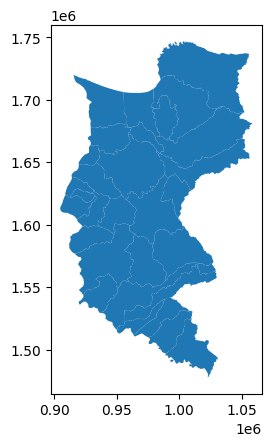

In [39]:
%matplotlib inline
data.plot()

> Exportar el archivo shape a un archivo geojson

In [40]:
nuevo_json= "my_file.geojson1"
data.to_file(nuevo_json, driver="GeoJSON")

<AxesSubplot: >

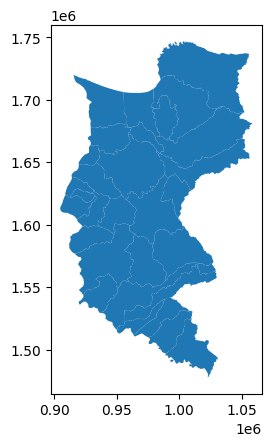

In [41]:
magdalena2 = gpd.read_file(nuevo_json)
%matplotlib inline
magdalena2.plot()


> **Calcular el área de cada polígono**

In [42]:
gdf = data.set_index("NOMBRE_ENT")

In [43]:
gdf["area"] = gdf.area
gdf["area"]

NOMBRE_ENT
EL BANCO                       8.329972e+08
GUAMAL                         5.493465e+08
SAN ZENÓN                      2.564695e+08
SAN SEBASTIÁN DE BUENAVISTA    4.388102e+08
SANTA BÁRBARA DE PINTO         4.951142e+08
PIJIÑO  DEL CARMEN             6.749247e+08
SANTA ANA                      1.118257e+09
NUEVA GRANADA                  8.475827e+08
ARIGUANÍ (El Difícil)          1.132789e+09
TENERIFE                       4.949307e+08
PLATO                          1.450428e+09
CHIBOLO                        5.369671e+08
PEDRAZA                        3.212684e+08
ZAPAYÁN                        3.527583e+08
CONCORDIA                      1.094158e+08
CERRO DE SAN ANTONIO           1.750422e+08
SABANAS DE SAN ÁNGEL           1.235810e+09
ALGARROBO                      4.074037e+08
EL PIÑÓN                       5.585613e+08
SALAMINA                       1.698386e+08
FUNDACIÓN                      9.698879e+08
PIVIJAY                        1.639806e+09
REMOLINO             

> **Obtener el límite del polígono y el centroide**

NOMBRE_ENT
EL BANCO                       LINESTRING (1030623.803 1493584.550, 1030639.9...
GUAMAL                         LINESTRING (1010538.495 1529857.214, 1010533.0...
SAN ZENÓN                      LINESTRING (987998.042 1540559.989, 988010.042...
SAN SEBASTIÁN DE BUENAVISTA    LINESTRING (993228.015 1541632.453, 993228.211...
SANTA BÁRBARA DE PINTO         LINESTRING (951185.447 1549543.920, 951182.701...
PIJIÑO  DEL CARMEN             LINESTRING (1028985.061 1561740.229, 1028985.0...
SANTA ANA                      LINESTRING (1026259.045 1568295.376, 1026259.3...
NUEVA GRANADA                  LINESTRING (979000.306 1584343.760, 978998.753...
ARIGUANÍ (El Difícil)          LINESTRING (1026406.662 1573377.188, 1026382.2...
TENERIFE                       LINESTRING (935981.801 1599066.517, 935987.684...
PLATO                          LINESTRING (960035.033 1599604.087, 959992.621...
CHIBOLO                        LINESTRING (954263.309 1623329.809, 954216.114...
PEDRAZA          

<AxesSubplot: >

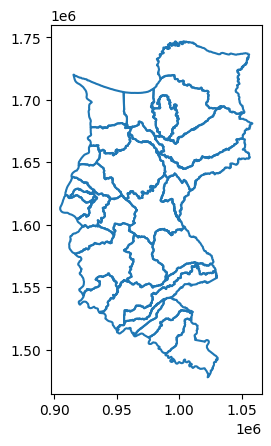

In [44]:
gdf['boundary'] = gdf.boundary
print(gdf['boundary'])
gdf['boundary'].plot()


NOMBRE_ENT
EL BANCO                       POINT (1010617.564 1499986.862)
GUAMAL                          POINT (992851.578 1514232.629)
SAN ZENÓN                       POINT (969076.853 1523077.504)
SAN SEBASTIÁN DE BUENAVISTA     POINT (986430.311 1526015.151)
SANTA BÁRBARA DE PINTO          POINT (937348.233 1544785.825)
PIJIÑO  DEL CARMEN              POINT (992275.988 1545375.549)
SANTA ANA                       POINT (971215.216 1544451.792)
NUEVA GRANADA                   POINT (972432.848 1568517.236)
ARIGUANÍ (El Difícil)           POINT (999256.686 1579265.873)
TENERIFE                        POINT (928049.523 1589216.714)
PLATO                           POINT (942579.083 1572145.570)
CHIBOLO                         POINT (950818.810 1608640.863)
PEDRAZA                         POINT (917512.760 1614719.530)
ZAPAYÁN                         POINT (932735.990 1610690.158)
CONCORDIA                       POINT (923244.907 1623460.240)
CERRO DE SAN ANTONIO            POINT (91867

<AxesSubplot: >

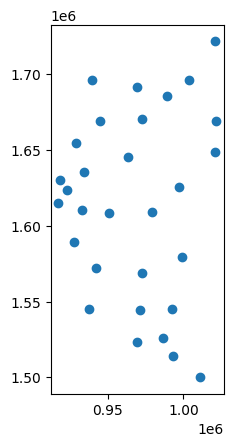

In [45]:
gdf['centroid'] = gdf.centroid
print(gdf['centroid'])
gdf['centroid'].plot()

> **Calcular las distancias entre los centroides**

NOMBRE_ENT
EL BANCO                            0.000000
GUAMAL                          22772.178861
SAN ZENÓN                       47526.923229
SAN SEBASTIÁN DE BUENAVISTA     35531.605903
SANTA BÁRBARA DE PINTO          85879.810530
PIJIÑO  DEL CARMEN              48954.532619
SANTA ANA                       59411.068174
NUEVA GRANADA                   78450.523292
ARIGUANÍ (El Difícil)           80088.894489
TENERIFE                       121570.751953
PLATO                           99177.184670
CHIBOLO                        124022.508735
PEDRAZA                        147756.859090
ZAPAYÁN                        135354.199267
CONCORDIA                      151260.226712
CERRO DE SAN ANTONIO           159404.778703
SABANAS DE SAN ÁNGEL           113676.488875
ALGARROBO                      126379.115364
EL PIÑÓN                       155695.259761
SALAMINA                       174743.806337
FUNDACIÓN                      148794.133088
PIVIJAY                        153030.882757

<AxesSubplot: xlabel='NOMBRE_ENT'>

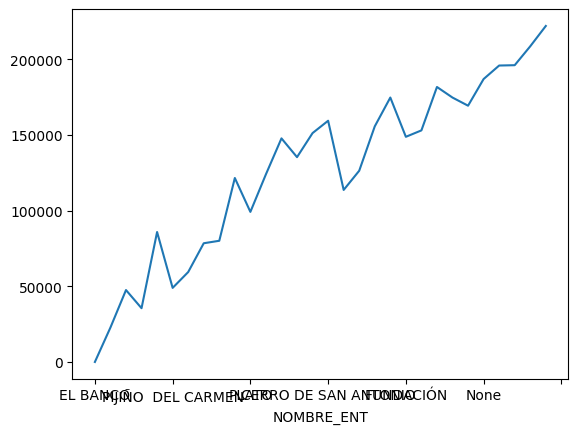

In [46]:
first_point = gdf['centroid'].iloc[0]
gdf['distance'] = gdf['centroid'].distance(first_point)
print(gdf['distance'])
gdf['distance'].plot()

In [47]:
gdf['distance'].mean() # Promedio de las distancias

126829.73637308412

# Hacer mapas

<AxesSubplot: >

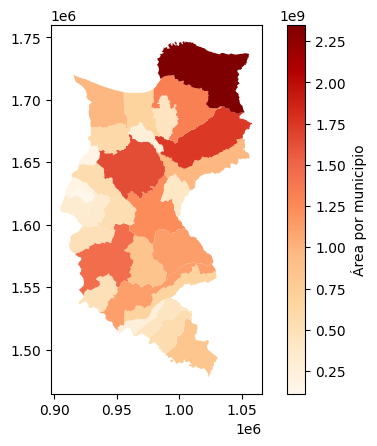

In [48]:
# gdf.plot("COD_MUNICI", legend=True)
import matplotlib.pyplot as plt
gdf = gdf.set_geometry("geometry")
fig, ax = plt.subplots(1, 1)
gdf.plot(column="area",
         cmap='OrRd',
         ax=ax,
         legend=True,
         legend_kwds={'label': "Área por municipio",
                      'orientation': "vertical"}
         )


# Gráficas dinámicas

In [49]:
gdf.explore("area", legend=False)

In [76]:
gdf.explore(
    column="area",  # make choropleth based on "BoroName" column
    tooltip="area",  # show "BoroName" value in tooltip (on hover)
    popup=True,  # show all values in popup (on click)
    # tiles="CartoDB positron",  # use "CartoDB positron" tiles
    cmap="Set1",  # use "Set1" matplotlib colormap
    style_kwds=dict(color="black"),  # use black outline
    legend=True,  # show legend
)


# Gráficas de centroides

<AxesSubplot: >

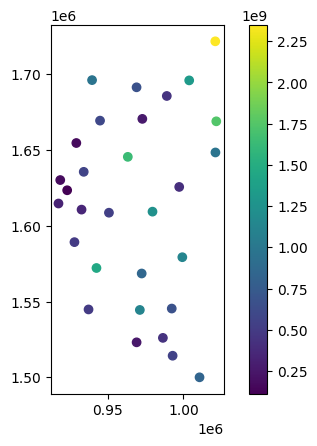

In [51]:
gdf = gdf.set_geometry("centroid")
gdf.plot("area", legend=True)

<AxesSubplot: >

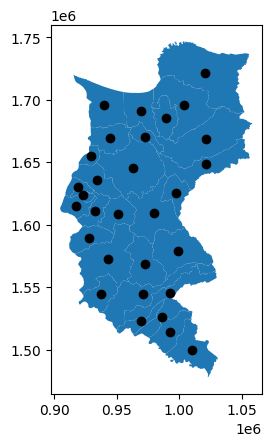

In [52]:
ax = gdf["geometry"].plot()
gdf["centroid"].plot(ax=ax, color="black")

In [53]:
gdf = gdf.set_geometry("geometry")

# Mapa convexo

<AxesSubplot: >

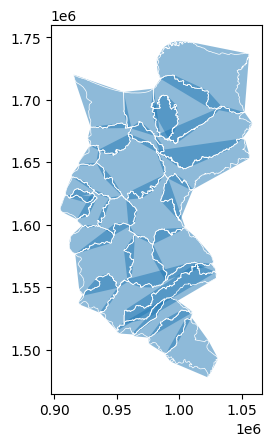

In [54]:
gdf["convex_hull"] = gdf.convex_hull
ax = gdf["convex_hull"].plot(alpha=.5)  # saving the first plot as an axis and setting alpha (transparency) to 0.5
gdf["boundary"].plot(ax=ax, color="white", linewidth=.5)  # passing the first plot and setting linewitdth to 0.5

# Crear buffer

In [55]:
# buffering the active geometry by 10 000 feet (geometry is already in feet)
gdf["buffered"] = gdf.buffer(10000)

# buffering the centroid geometry by 10 000 feet (geometry is already in feet)
gdf["buffered_centroid"] = gdf["centroid"].buffer(10000)

<AxesSubplot: >

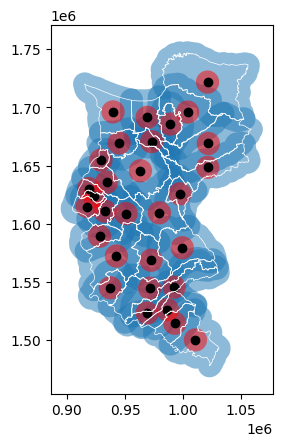

In [56]:
# saving the first plot as an axis and setting alpha (transparency) to 0.5
ax = gdf["buffered"].plot(alpha=.5)
# passing the first plot as an axis to the second
gdf["buffered_centroid"].plot(ax=ax, color="red", alpha=.5)
# passing the first plot and setting linewitdth to 0.5
gdf["boundary"].plot(ax=ax, color="white", linewidth=.5)
gdf["centroid"].plot(ax=ax, color="black")

# **Relaciones de geometría**

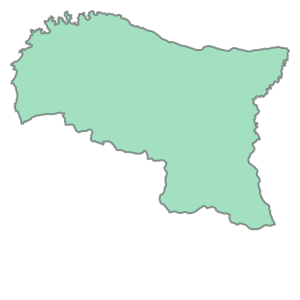

In [57]:
# Se puede sacar sólo un polígono
sm = gdf.loc["SANTA MARTA", "geometry"]
sm

In [58]:
type(sm)

shapely.geometry.polygon.Polygon

In [59]:
# Para ver los polígonos juntos a Santa Marta
gdf["buffered"].intersects(sm)

NOMBRE_ENT
EL BANCO                       False
GUAMAL                         False
SAN ZENÓN                      False
SAN SEBASTIÁN DE BUENAVISTA    False
SANTA BÁRBARA DE PINTO         False
PIJIÑO  DEL CARMEN             False
SANTA ANA                      False
NUEVA GRANADA                  False
ARIGUANÍ (El Difícil)          False
TENERIFE                       False
PLATO                          False
CHIBOLO                        False
PEDRAZA                        False
ZAPAYÁN                        False
CONCORDIA                      False
CERRO DE SAN ANTONIO           False
SABANAS DE SAN ÁNGEL           False
ALGARROBO                      False
EL PIÑÓN                       False
SALAMINA                       False
FUNDACIÓN                      False
PIVIJAY                        False
REMOLINO                       False
EL RETÉN                       False
ARACATACA                       True
None                           False
PUEBLO VIEJO               

# Buffer de los centroides que están dentro del polígono

In [60]:
gdf["within"] = gdf["buffered_centroid"].within(gdf)
gdf["within"]

NOMBRE_ENT
EL BANCO                       False
GUAMAL                         False
SAN ZENÓN                      False
SAN SEBASTIÁN DE BUENAVISTA    False
SANTA BÁRBARA DE PINTO         False
PIJIÑO  DEL CARMEN             False
SANTA ANA                      False
NUEVA GRANADA                  False
ARIGUANÍ (El Difícil)           True
TENERIFE                       False
PLATO                           True
CHIBOLO                        False
PEDRAZA                        False
ZAPAYÁN                        False
CONCORDIA                      False
CERRO DE SAN ANTONIO           False
SABANAS DE SAN ÁNGEL            True
ALGARROBO                      False
EL PIÑÓN                       False
SALAMINA                       False
FUNDACIÓN                      False
PIVIJAY                         True
REMOLINO                       False
EL RETÉN                       False
ARACATACA                       True
None                           False
PUEBLO VIEJO               

<AxesSubplot: >

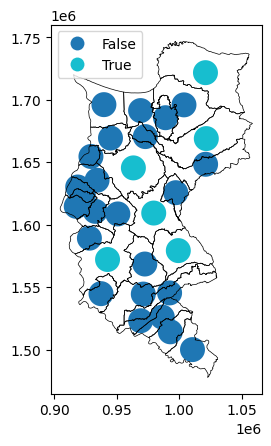

In [61]:
gdf = gdf.set_geometry("buffered_centroid")
ax = gdf.plot("within", legend=True, categorical=True, legend_kwds={'loc': "upper left"})  # using categorical plot and setting the position of the legend
gdf["boundary"].plot(ax=ax, color="black", linewidth=.5)  # passing the first plot and setting linewitdth to 0.5

# **Proyecciones de coordenadas**

In [62]:
gdf.crs

<Derived Projected CRS: EPSG:3116>
Name: MAGNA-SIRGAS / Colombia Bogota zone
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Colombia - onshore between 1°30'W and 1°30'E of Bogota (75°35'W and 72°35'W of Greenwich).
- bounds: (-75.59, -2.51, -72.58, 11.82)
Coordinate Operation:
- name: Colombia MAGNA Bogota zone
- method: Transverse Mercator
Datum: Marco Geocentrico Nacional de Referencia
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot: >

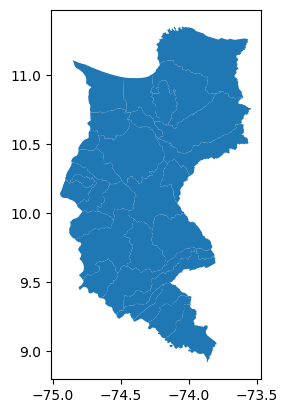

In [63]:
gdf = gdf.set_geometry("geometry")
boroughs_4326 = gdf.to_crs("EPSG:4326")
boroughs_4326.plot()

In [64]:
boroughs_4326.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich